# Unsupervised learning HANDS ON!

Here an example on how to generate data in classes, and work on the data directly via their classes. 

#### Let's get back the class from the previous example

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def make_distribution(n_points, range, distribution='normal'):
    if distribution == 'normal':
        data = np.random.randn(n_points) 
    else:
        data = np.random.rand(n_points)  

    data *= (range[1] - range[0]) 
    data += range[0]
    return data
    
   
class Data_generator():
    def __init__(self, description='Data generator', data_settings={}):
        self.description = description
        self.n_points = data_settings.get('n_points')
        self.x_range = data_settings.get('x_range', [-1, 1])
        self.y_range = data_settings.get('y_range',  [-1, 1])
        self.true_slope = data_settings.get('true_slope', 0)
        self.true_intercept = data_settings.get('true_intercept', 0)
        
        self.data = None
    
    def generate_data(self, x_distribution='not_normal', y_distribution='not_normal'):    

        x = make_distribution(self.n_points, self.x_range, x_distribution) 
        y = make_distribution(self.n_points, self.y_range, y_distribution) 
            
        # Add 'perfect' data 
        y += self.true_slope * x + self.true_intercept
                
        self.data = [x, y] 
        
    def plot_me(self):
        plt.scatter(self.data[0], self.data[1])
        
    def __add__(self, data_class):
        self.data = np.append(self.data[0], data_class.data[0]), np.append(self.data[1], data_class.data[1])
        return self
                
    def __str__(self):
        return f'Class {self.description} for 2D data' 

### Prepare methods (in a .py file is much cleaner)

In [6]:
def make_data(data_settings):
    """
    Generate data from several distributions.

    Input
    -----
    data_settings: dict
        It contains the parameters to generate data

    Output
    ------
    data: np.array
        The generated data

    """
    main_data = Data_generator(data_settings=data_settings[0])
    main_data.generate_data() 
    for i in range(1, len(data_settings)):
        generator = Data_generator(data_settings=data_settings[i])
        generator.generate_data() 
        main_data += generator 

    main_data.plot_me()
    plt.title('Source distribution')
    return np.array(main_data.data).T


In [7]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


def clustering(data, method="kmeans", plot=True):
    """
    Apply clustering to your data.

    Input
    -----
    data: np.array
        The data for clustering

    Output
    ------
    labels: np.array
        The label (cluster) of the data
    """
    labels = None
    if method.lower() == "kmeans":
        kmeans = KMeans(n_clusters=4) 
        kmeans.fit(data)
        labels = kmeans.labels_
    elif method.lower() == "gmm":
        gmm = GaussianMixture(n_components=4)
        gmm.fit(data)
        labels = gmm.predict(data)
    else:
        raise ValueError(f"Clustering method {method} not implemented")

    if plot: 
        plt.title(f"Clustering method: {method}")
        plt.scatter(data[:, 0], data[:, 1], c=labels) 
        plt.show()
        

    return labels
        

### K-Means Clustering & Gaussian Mixture Modeling

###

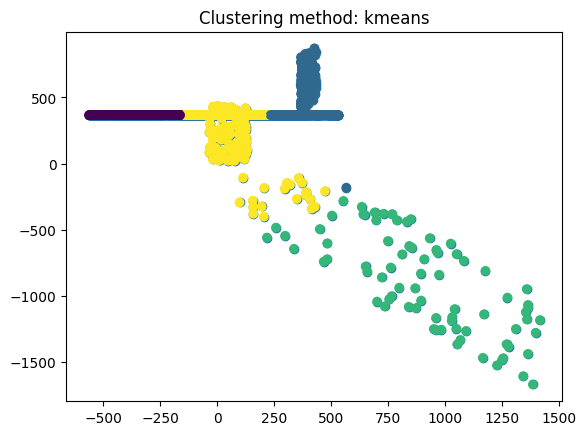

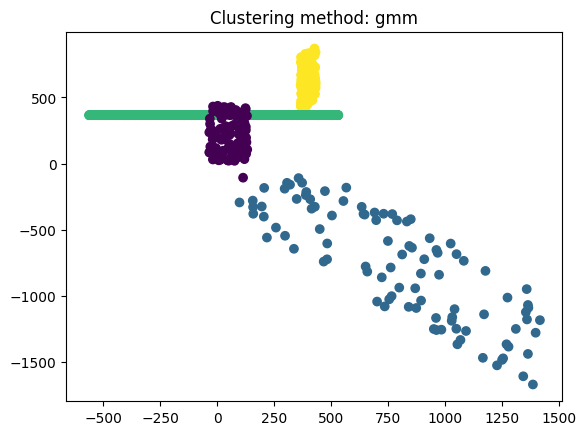

array([3, 3, 3, ..., 3, 3, 3], shape=(1400,))

In [8]:
## And let's plot it for a random dataset
data_settings = [{'n_points':  100, 'x_range': [ 366,  433], 'y_range': [  16,  433], 'true_slope':  1, 'true_intercept': 10},
                 {'n_points':  100, 'x_range': [  66, 1433], 'y_range': [-366,  433], 'true_slope': -1, 'true_intercept': 10},
                 {'n_points': 1000, 'x_range': [-566,  533], 'y_range': [ 366,  366], 'true_slope':  0, 'true_intercept':  0},
                 {'n_points':  100, 'x_range': [ -36,  133], 'y_range': [   6,  433], 'true_slope':  0, 'true_intercept': 10},
                 {'n_points':  100, 'x_range': [ 366,  433], 'y_range': [ 566,  633], 'true_slope':  0, 'true_intercept': 10}]
 

data = make_data(data_settings)
 
clustering(data, method="kmeans")
clustering(data, method="gmm")
 